In [2]:
import pandas as pd
df = pd.read_csv('Healthcare Providers.csv')



Epoch 1/5

2500/2500 [==============================] - 8s 3ms/step - loss: 0.0023 - val_loss: 4.2752e-06
Epoch 2/5
2500/2500 [==============================] - 5s 2ms/step - loss: 2.1198e-05 - val_loss: 3.2206e-05
Epoch 3/5
2500/2500 [==============================] - 4s 2ms/step - loss: 1.1065e-05 - val_loss: 8.9018e-07
Epoch 4/5
2500/2500 [==============================] - 4s 2ms/step - loss: 8.2370e-06 - val_loss: 2.3081e-06
Epoch 5/5
625/625 [==============================] - 1s 1ms/step
Average Reconstruction Loss for Normal Data: 0.0004751002707052976
Anomaly Detection Threshold: 0.001897452078992501
Number of Anomalies Detected: 36


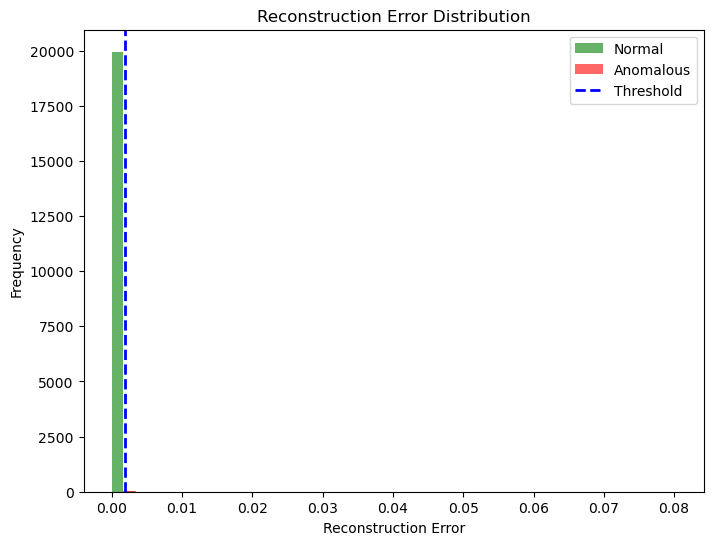

Anomaly 1: Reconstruction Error = 0.0024236899334937334
Anomaly 2: Reconstruction Error = 0.0020566973835229874
Anomaly 3: Reconstruction Error = 0.004169680178165436
Anomaly 4: Reconstruction Error = 0.0021019084379076958
Anomaly 5: Reconstruction Error = 0.012186750769615173
Anomaly 6: Reconstruction Error = 0.007946491241455078
Anomaly 7: Reconstruction Error = 0.0027627460658550262
Anomaly 8: Reconstruction Error = 0.08019320666790009
Anomaly 9: Reconstruction Error = 0.0020955735817551613
Anomaly 10: Reconstruction Error = 0.004251599311828613
Anomaly 11: Reconstruction Error = 0.03910057246685028
Anomaly 12: Reconstruction Error = 0.0020995233207941055
Anomaly 13: Reconstruction Error = 0.013281680643558502
Anomaly 14: Reconstruction Error = 0.0019295909442007542
Anomaly 15: Reconstruction Error = 0.002087987959384918
Anomaly 16: Reconstruction Error = 0.00213470496237278
Anomaly 17: Reconstruction Error = 0.009795449674129486
Anomaly 18: Reconstruction Error = 0.0124868229031562

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
df['Average Medicare Allowed Amount'] = df['Average Medicare Allowed Amount'].astype(str).str.replace(',', '').astype(float)
df['Average Medicare Payment Amount'] = df['Average Medicare Payment Amount'].astype(str).str.replace(',', '').astype(float)
data = df[['Average Medicare Allowed Amount', 'Average Medicare Payment Amount']].values
data = data.astype('float32')
data = (data - data.min()) / (data.max() - data.min())  

# Split the data into train and test sets
x_train, x_test = train_test_split(data, test_size=0.2, random_state=42)

# Build the AutoEncoder model
model = Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),  # Adjust input shape
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(x_train.shape[1], activation='sigmoid')
])

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(x_train, x_train, epochs=5, batch_size=32, validation_data=(x_test, x_test))

# Function to calculate reconstruction loss
def calculate_reconstruction_loss(data, model):
    reconstructions = model.predict(data)
    reconstruction_errors = np.mean(np.abs(data - reconstructions), axis=1)
    return reconstruction_errors

# Evaluate the model
reconstruction_loss_normal = calculate_reconstruction_loss(x_test, model)

# Define an anomaly detection threshold
threshold = np.mean(reconstruction_loss_normal) + 2 * np.std(reconstruction_loss_normal)

# Detect anomalies in the test set
anomalies = x_test[reconstruction_loss_normal > threshold]
reconstruction_loss_anomalies = reconstruction_loss_normal[reconstruction_loss_normal > threshold]

# Print average reconstruction loss
print(f"Average Reconstruction Loss for Normal Data: {np.mean(reconstruction_loss_normal)}")
print(f"Anomaly Detection Threshold: {threshold}")
print(f"Number of Anomalies Detected: {len(anomalies)}")

# Visualization of reconstruction error distribution
plt.figure(figsize=(8, 6))
plt.hist(reconstruction_loss_normal, bins=50, alpha=0.6, color='g', label='Normal')
plt.hist(reconstruction_loss_anomalies, bins=50, alpha=0.6, color='r', label='Anomalous')
plt.axvline(x=threshold, color='b', linestyle='dashed', linewidth=2, label='Threshold')
plt.title('Reconstruction Error Distribution')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Visualize anomalies with high reconstruction error
for i, anomaly in enumerate(anomalies):
    print(f"Anomaly {i+1}: Reconstruction Error = {reconstruction_loss_anomalies[i]}")


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
ROC AUC: 1.0


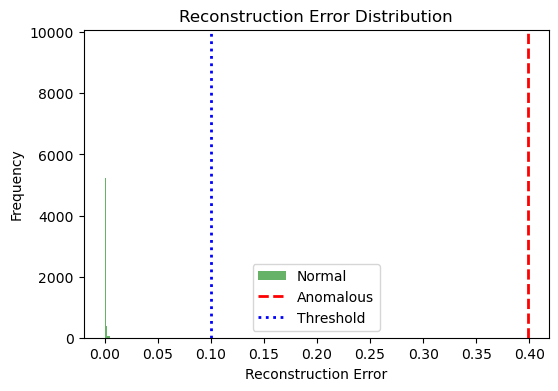

In [6]:
y_true = [0] * len(reconstruction_loss_normal) + [1]  # 0 for normal, 1 for anomaly
y_pred = list((reconstruction_loss_normal > threshold).astype(int)) + \
         [(reconstruction_loss_anomalous[0] > threshold).astype(int)]

# Calculate accuracy, precision, recall, F1-score, and ROC AUC
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC AUC:", roc_auc)

# Visualization of reconstruction error distribution
plt.figure(figsize=(6, 4))
plt.hist(reconstruction_loss_normal, bins=50, alpha=0.6, color='g', label='Normal')
plt.axvline(x=reconstruction_loss_anomalous[0], color='r', linestyle='dashed', linewidth=2, label='Anomalous')
plt.axvline(x=threshold, color='blue', linestyle='dotted', linewidth=2, label='Threshold')
plt.title('Reconstruction Error Distribution')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.legend()